In [1]:
from funcs import *

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [3]:
df = wrangle("train.csv")
df

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance
0,1,X059CP797,2024-12-26 00:00:00,65000,2024,december,thursday,XCP,059,Москва,not governmental,0,0,0
1,2,Y800MH790,2024-07-12 21:31:37,100000,2024,july,friday,YMH,800,Московская область,not governmental,0,0,0
2,3,A212TX77,2024-04-18 00:00:00,290000,2024,april,thursday,ATX,212,Москва,not governmental,0,0,0
3,4,P001AY199,2025-01-03 00:27:15,680000,2025,january,friday,PAY,001,Москва,not governmental,0,0,0
4,5,P001AY199,2025-01-10 09:32:41,750000,2025,january,friday,PAY,001,Москва,not governmental,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,2025-01-29 00:00:00,70000,2025,january,wednesday,XPP,023,Москва,not governmental,0,0,0
51631,51632,M004KA161,2025-01-31 00:00:00,1600000,2025,january,friday,MKA,004,Ростовская область,not governmental,0,0,0
51632,51633,E888EB199,2025-02-06 00:00:00,850000,2025,february,thursday,EEB,888,Москва,not governmental,0,0,0
51633,51634,X023XK77,2024-04-24 11:30:07,150000,2024,april,wednesday,XXK,023,Москва,not governmental,0,0,0


In [4]:
X = pd.get_dummies(df.drop(["id", "plate", "date", "dept_name", "price"], axis=1))
X = (X - X.mean()) / X.std()
X

,forb_buy,adv_road,significance,year_2021,year_2022,year_2023,year_2024,year_2025,month_april,month_august,...,region_Удмуртская Республика,region_Ульяновская область,region_Хабаровский край,region_Ханты-Мансийский автономный округ,region_Челябинская область,region_Чеченская Республика,region_Чувашская Республика,region_Чукотский автономный округ,region_Ямало-Ненецкий автономный округ,region_Ярославская область
0,-0.007622,-0.108244,-0.102895,-0.147124,-0.388682,-0.488195,1.149967,-0.538066,-0.239040,-0.263944,...,-0.042477,-0.03658,-0.050045,-0.056962,-0.076573,-0.068478,-0.038895,-0.013203,-0.026044,-0.043606
1,-0.007622,-0.108244,-0.102895,-0.147124,-0.388682,-0.488195,1.149967,-0.538066,-0.239040,-0.263944,...,-0.042477,-0.03658,-0.050045,-0.056962,-0.076573,-0.068478,-0.038895,-0.013203,-0.026044,-0.043606
2,-0.007622,-0.108244,-0.102895,-0.147124,-0.388682,-0.488195,1.149967,-0.538066,4.183324,-0.263944,...,-0.042477,-0.03658,-0.050045,-0.056962,-0.076573,-0.068478,-0.038895,-0.013203,-0.026044,-0.043606
3,-0.007622,-0.108244,-0.102895,-0.147124,-0.388682,-0.488195,-0.869574,1.858471,-0.239040,-0.263944,...,-0.042477,-0.03658,-0.050045,-0.056962,-0.076573,-0.068478,-0.038895,-0.013203,-0.026044,-0.043606
4,-0.007622,-0.108244,-0.102895,-0.147124,-0.388682,-0.488195,-0.869574,1.858471,-0.239040,-0.263944,...,-0.042477,-0.03658,-0.050045,-0.056962,-0.076573,-0.068478,-0.038895,-0.013203,-0.026044,-0.043606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,-0.007622,-0.108244,-0.102895,-0.147124,-0.388682,-0.488195,-0.869574,1.858471,-0.239040,-0.263944,...,-0.042477,-0.03658,-0.050045,-0.056962,-0.076573,-0.068478,-0.038895,-0.013203,-0.026044,-0.043606
51631,-0.007622,-0.108244,-0.102895,-0.147124,-0.388682,-0.488195,-0.869574,1.858471,-0.239040,-0.263944,...,-0.042477,-0.03658,-0.050045,-0.056962,-0.076573,-0.068478,-0.038895,-0.013203,-0.026044,-0.043606
51632,-0.007622,-0.108244,-0.102895,-0.147124,-0.388682,-0.488195,-0.869574,1.858471,-0.239040,-0.263944,...,-0.042477,-0.03658,-0.050045,-0.056962,-0.076573,-0.068478,-0.038895,-0.013203,-0.026044,-0.043606
51633,-0.007622,-0.108244,-0.102895,-0.147124,-0.388682,-0.488195,1.149967,-0.538066,4.183324,-0.263944,...,-0.042477,-0.03658,-0.050045,-0.056962,-0.076573,-0.068478,-0.038895,-0.013203,-0.026044,-0.043606


In [5]:
y = df["price"]
y

0          65000
1         100000
2         290000
3         680000
4         750000
          ...   
51630      70000
51631    1600000
51632     850000
51633     150000
51634      25000
Name: price, Length: 51635, dtype: int64

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

In [7]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
X_train.shape

torch.Size([41308, 2842])

In [8]:
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
y_train.shape

torch.Size([41308])

In [9]:
train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)

In [10]:
torch.manual_seed(42)

In [11]:
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=256, shuffle=False)
train_dl

In [24]:
model = nn.Sequential()
model.add_module(
    "ll1",
    nn.Linear(
        in_features=X_train.shape[1], out_features=700
    )
)
model.add_module("relu1", nn.ReLU())
model.add_module("dropout", nn.Dropout(p=0.5))
model.add_module(
    "ll2",
    nn.Linear(
        in_features=700, out_features=700
    )
)
model

Sequential(
  (ll1): Linear(in_features=2842, out_features=700, bias=True)
  (relu1): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (ll2): Linear(in_features=700, out_features=700, bias=True)
)

In [13]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0143,  0.0156, -0.0044,  ...,  0.0064,  0.0164, -0.0020],
         [ 0.0132,  0.0066,  0.0054,  ..., -0.0103, -0.0153, -0.0056],
         [-0.0144,  0.0102, -0.0023,  ..., -0.0050, -0.0114, -0.0170],
         ...,
         [-0.0131, -0.0027, -0.0106,  ...,  0.0120,  0.0098,  0.0037],
         [ 0.0072,  0.0057, -0.0177,  ..., -0.0031,  0.0078,  0.0003],
         [-0.0162,  0.0150,  0.0160,  ...,  0.0121, -0.0100,  0.0185]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0012,  0.0037,  0.0173, -0.0165,  0.0127,  0.0153,  0.0155,  0.0065],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.1099, -0.2404,  0.2596,  0.0837,  0.2732,  0.2159, -0.1896,  0.2355]],
        requires_grad=True),
 Parameter containing:
 tensor([0.0295], requires_grad=True)]

In [25]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
i = 3
for x_batch, y_batch in train_dl:
    if i < 5:
        print(x_batch, y_batch)
    i += 1

In [82]:
len(train_dl.dataset)

41308

In [26]:
def train(model, n_epochs, train_dl, val_dl):
    loss_hist_train = [0] * n_epochs
    loss_hist_val = [0] * n_epochs
    for epoch in range(n_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item() * y_batch.size(0)
        loss_hist_train[epoch] = loss_hist_train[epoch] / len(train_dl.dataset)
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in val_dl:
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch)
                loss_hist_val[epoch] = loss.item() * y_batch.size(0)
        loss_hist_val[epoch] = loss_hist_val[epoch] / len(val_dl.dataset)
        if epoch % 50 == 0:
                print(f"Epoch: {epoch}, Training loss: {loss_hist_train[epoch]}, Validation Loss: {loss_hist_val[epoch]}")
    return loss_hist_train, loss_hist_val                

In [ ]:
n_epochs = 1000
hist = train(model, n_epochs, train_dl, val_dl)

Epoch: 0, Training loss: 3516993725160.8716, Validation Loss: 1518762078.9929311
Epoch: 50, Training loss: 3079567011420.7617, Validation Loss: 910865801.9529389


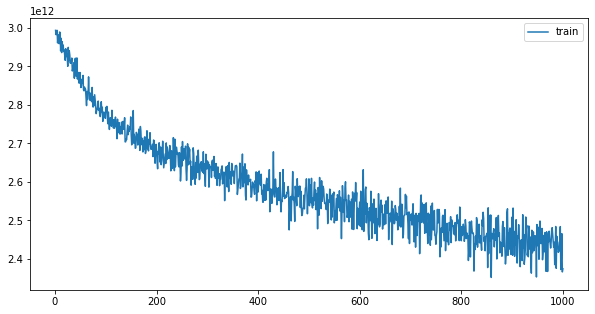

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1, n_epochs + 1), hist[0], label="train")
ax.plot(range(1, n_epochs + 1), hist[1], label="validation")
ax.set_yscale('log')
ax.legend()

In [109]:
pred = model(torch.tensor(X.values, dtype=torch.float32)).detach().numpy()
len(pred)

51635

In [ ]:
smape_torch(pred, y)

In [107]:
def smape_torch(pred, y):
    return 100 / len(y) * sum(abs(y - pred) / (abs(y) + abs(pred)) * 2)